In [2]:
import pandas as pd
import numpy as np

/Users/nirjharagarwal/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
zero_counts = df.apply(lambda x: x.value_counts().get(0, 0))
zero_counts

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [9]:
df['Glucose'] = df['Glucose'].replace(0,np.nan).fillna(df['Glucose'].mean())

In [10]:
df['BloodPressure'] = df['BloodPressure'].replace(0,np.nan).fillna(df['BloodPressure'].mean())

In [11]:
df['SkinThickness'] = df['SkinThickness'].replace(0,np.nan).fillna(df['SkinThickness'].median())

In [12]:
df['Insulin'] = df['Insulin'].replace(0,np.nan).fillna(df['Insulin'].median())

In [13]:
df['BMI'] = df['BMI'].replace(0,np.nan).fillna(df['BMI'].median())

In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


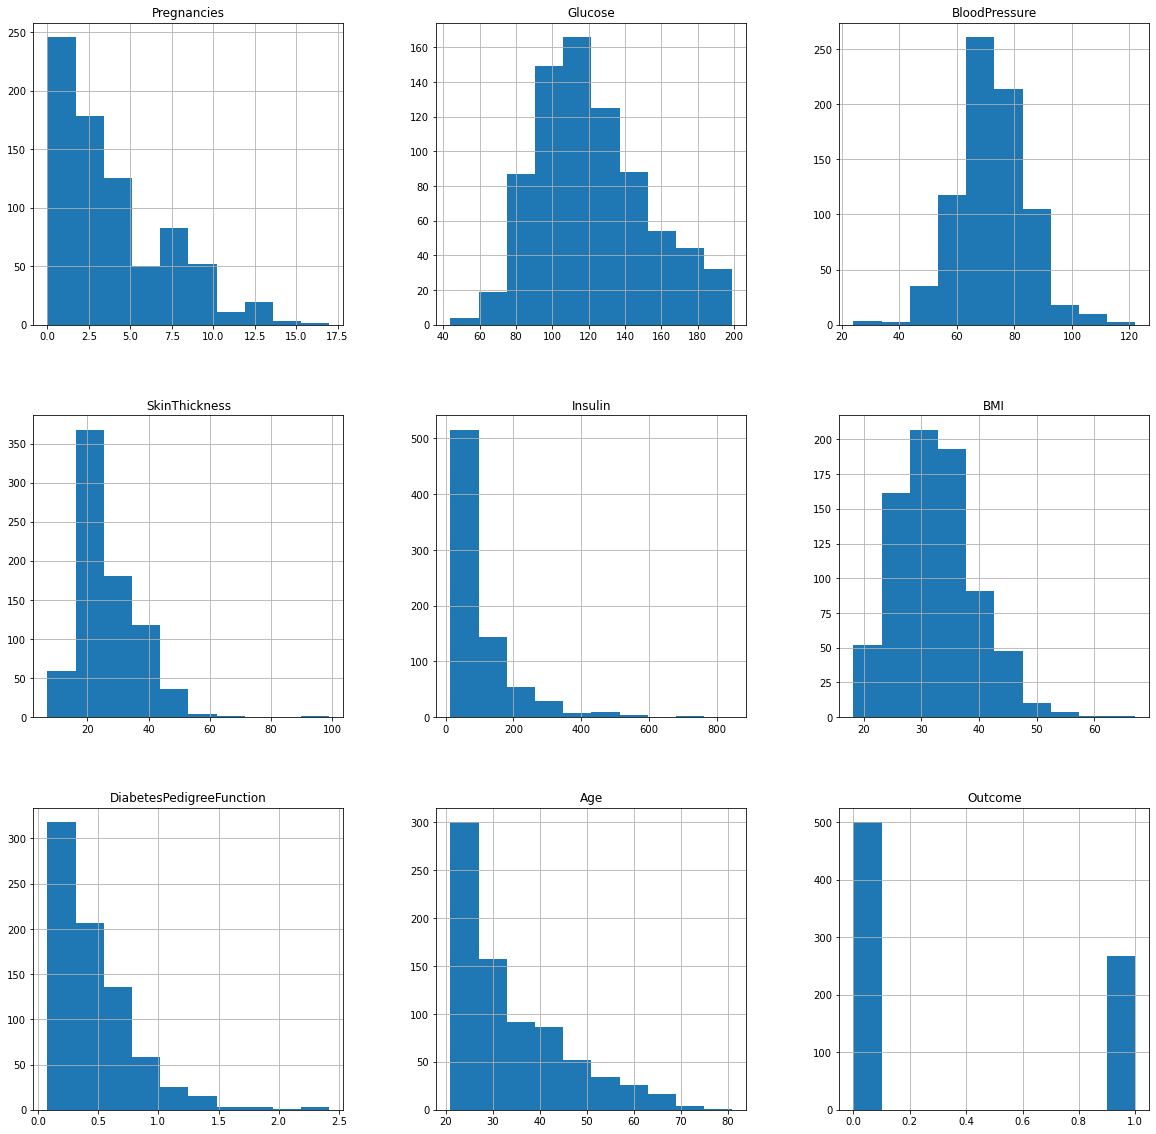

In [16]:
p = df.hist(figsize = (20,20))

In [17]:
df.shape

(768, 9)

In [18]:
df.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

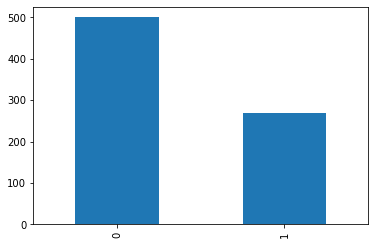

In [19]:
df['Outcome'].value_counts().plot(kind='bar')
plt.show()

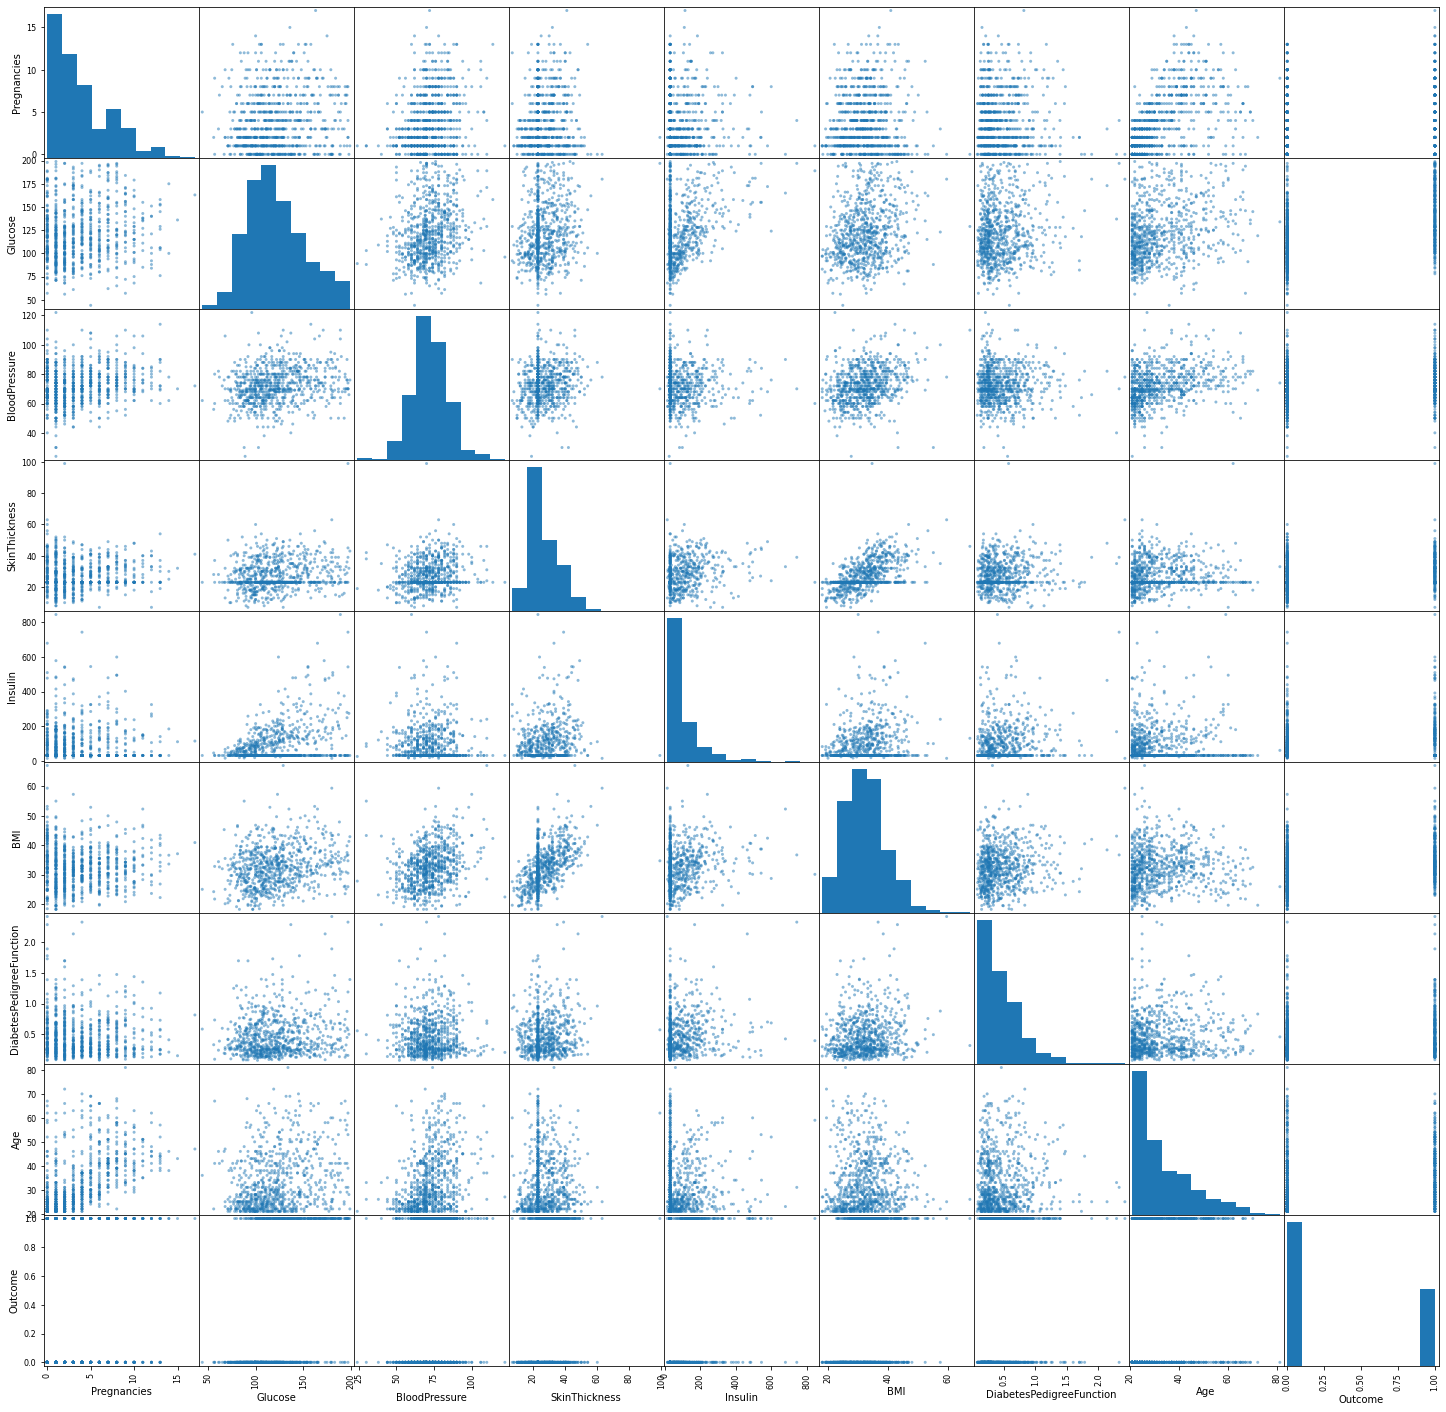

In [20]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(df,figsize=(25, 25))

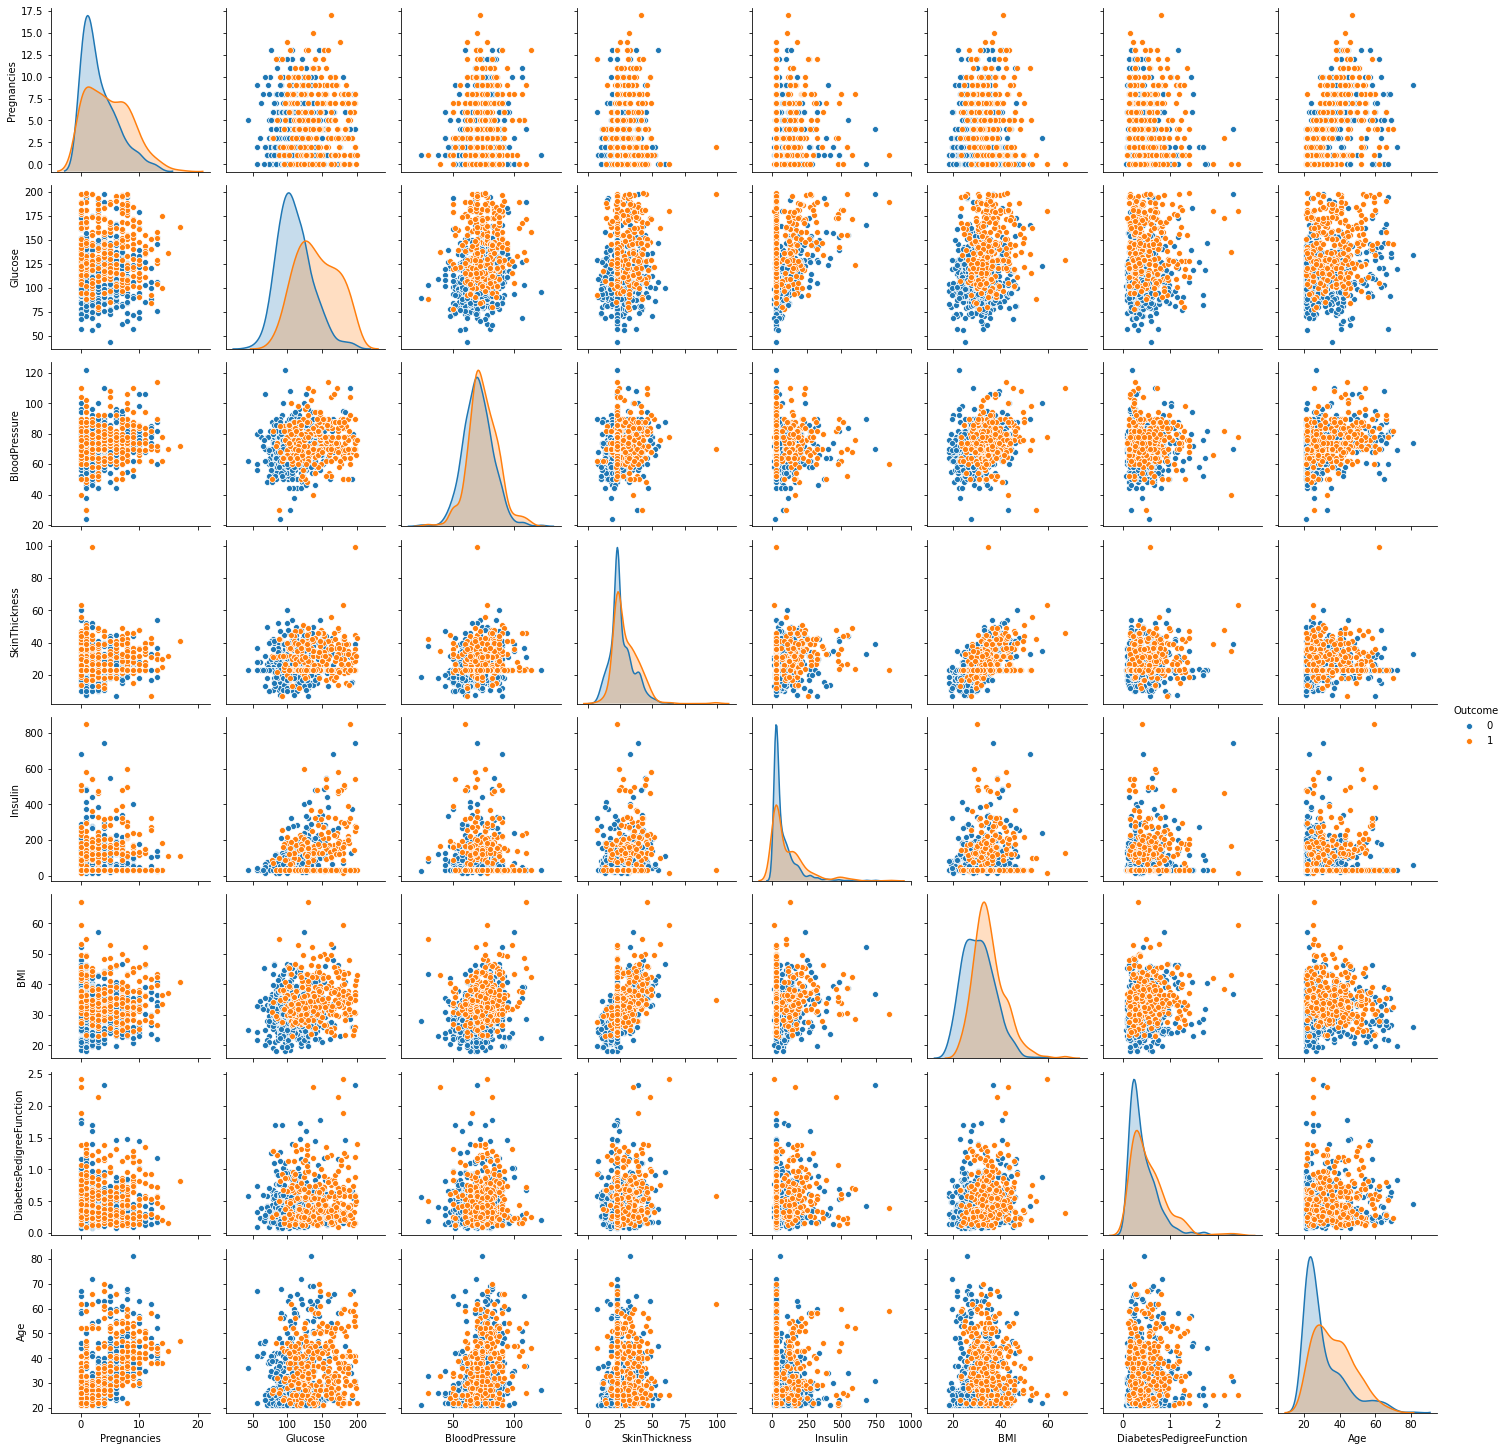

In [21]:
p=sns.pairplot(df, hue = 'Outcome')

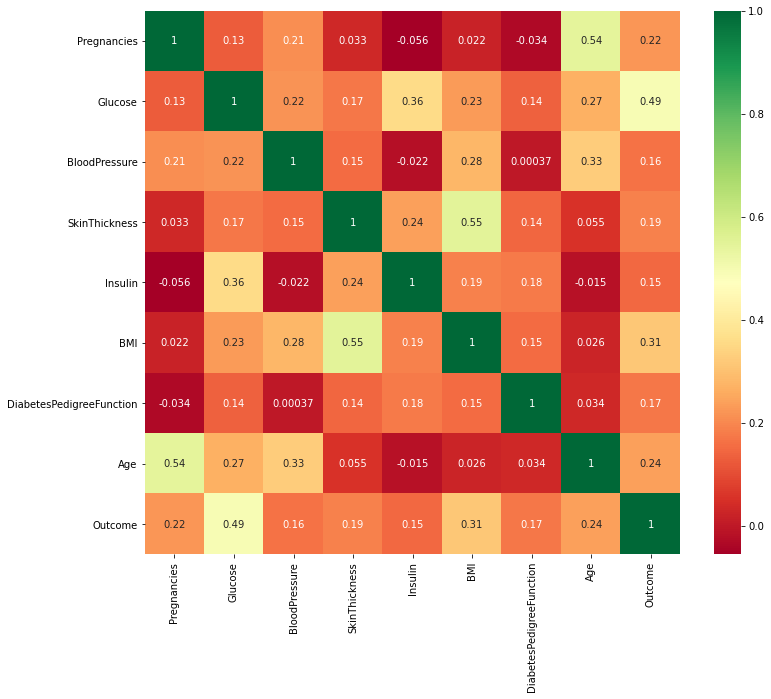

In [22]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [5]:
x = {'a':'1', 'b':'2', 'c':'3', 'd':{'e':'4', 'f':'5','g':{'h':'6'}} }

In [7]:
sample_dict['d']['g']['h']

'6'

In [ ]:
 {x.a:1,x.b:2,x.c:3,x.d.e:4}

In [ ]:
x.a = {}

In [1]:
import datetime

def timestamp_to_unixtimestamp(timestamp):
    # Convert the timestamp to a datetime object
    dt = datetime.datetime.strptime(timestamp, "%Y-%m-%d %H:%M:%S")

    # Get the Unix timestamp
    unix_timestamp = dt.timestamp()

    return int(unix_timestamp)

# Example usage
timestamp = "2023-06-23 12:34:56"
unix_timestamp = timestamp_to_unixtimestamp(timestamp)
print(unix_timestamp)


1687538096


In [8]:
def sort_list_with_original_positions(input_list):
    # Enumerate the list to get tuples of (index, value)
    indexed_list = list(enumerate(input_list))

    # Sort the indexed list based on the values (second element in the tuple)
    sorted_indexed_list = sorted(indexed_list, key=lambda x: x[1])

    # Extract the sorted values (second element of each tuple) and create the sorted list
    sorted_list = [item[1] for item in sorted_indexed_list]

    return sorted_list

In [9]:
input_list = [9, 5, 2, 7, 1, 8]
result = sort_list_with_original_positions(input_list)
print(result)  # Output: [1, 2, 5, 7, 8, 9]

[1, 2, 5, 7, 8, 9]


In [22]:
input_list = [9, 5, 2, 7, 1, 8]

indexed_list = list(enumerate(input_list))
print(indexed_list)
sorted_indexed_list = sorted(indexed_list, key=lambda x: x[1])
print(sorted_indexed_list)

newlist =[]
len1 = len(sorted_indexed_list)  
for i in range(len1//2+1):
    print(newlist)
    print(i)
    newlist.append([sorted_indexed_list[i][0],sorted_indexed_list[len1-1-i][0]])

[(0, 9), (1, 5), (2, 2), (3, 7), (4, 1), (5, 8)]
[(4, 1), (2, 2), (1, 5), (3, 7), (5, 8), (0, 9)]
[]
0
[[4, 0]]
1
[[4, 0], [2, 5]]
2
[[4, 0], [2, 5], [1, 3]]
3


In [17]:
sorted_indexed_list[0][0]

4

In [28]:
def min_total_waiting_time(queries):
    # Sort the queries in ascending order
    queries.sort()
    print(queries)
    total_waiting_time = 0
    n = len(queries)

    for i, duration in enumerate(queries):
        remaining_queries = n - (i + 1)
        waiting_time = duration * remaining_queries
        total_waiting_time += waiting_time

    return total_waiting_time

# Example usage:
queries = [5, 1, 4]
result = min_total_waiting_time(queries)
print(result)  # Output: 22


[1, 4, 5]
6


In [31]:
def progressive_sum(nums):
    
    progressive_sum_list = [sum(nums[:i+1]) for i in range(len(nums))]
    return progressive_sum_list

# Example usage:
nums = [5, 3, 3, 4, 5]
result = progressive_sum(nums)
print(result)  # Output: [1, 3, 6, 10, 15]


[5, 8, 11, 15, 20]


In [33]:
def progressive_sum(nums):
    nums.sort()  # Sorting the list
    progressive_sum_list = [sum(nums[:i+1]) for i in range(len(nums))]
    return progressive_sum_list

# Example usage:
nums = [1,3,6,11,17]
result = progressive_sum(nums)
print(result)  # Output: [1, 3, 6, 10, 15]


[1, 4, 10, 21, 38]


In [34]:
def can_measure_within_range(measuring_cups, low, high):
    possible_volumes = {0}  # Initialize with 0, as an empty cup can represent 0 volume

    while True:
        new_volumes = set()
        for volume in possible_volumes:
            for cup in measuring_cups:
                new_volume_low = volume + cup[0]
                new_volume_high = volume + cup[1]
                if low <= new_volume_low <= high:
                    return True
                new_volumes.add(new_volume_low)
                new_volumes.add(new_volume_high)

        if not new_volumes:
            break

        possible_volumes |= new_volumes  # Union the sets

    return False

# Example usage:
measuring_cups = [(3, 5), (7, 10)]
low = 4
high = 8
result = can_measure_within_range(measuring_cups, low, high)
print(result)  # Output: True


True
